In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
from pathlib import Path
import random
import pandas as pd

csv_path = "./output_dir/Lamphun/preds_test.csv"
df = pd.read_csv(csv_path)

# Bad classification
df_bad = df[df["y_true"] != df["y_pred"]].copy()

print(f"{len(df_bad)} error on {len(df)} images "
      f"({len(df_bad)/len(df):.1%})")
df_bad
df_bad.to_csv('df_bad.csv', index=False)  

23 error on 206 images (11.2%)


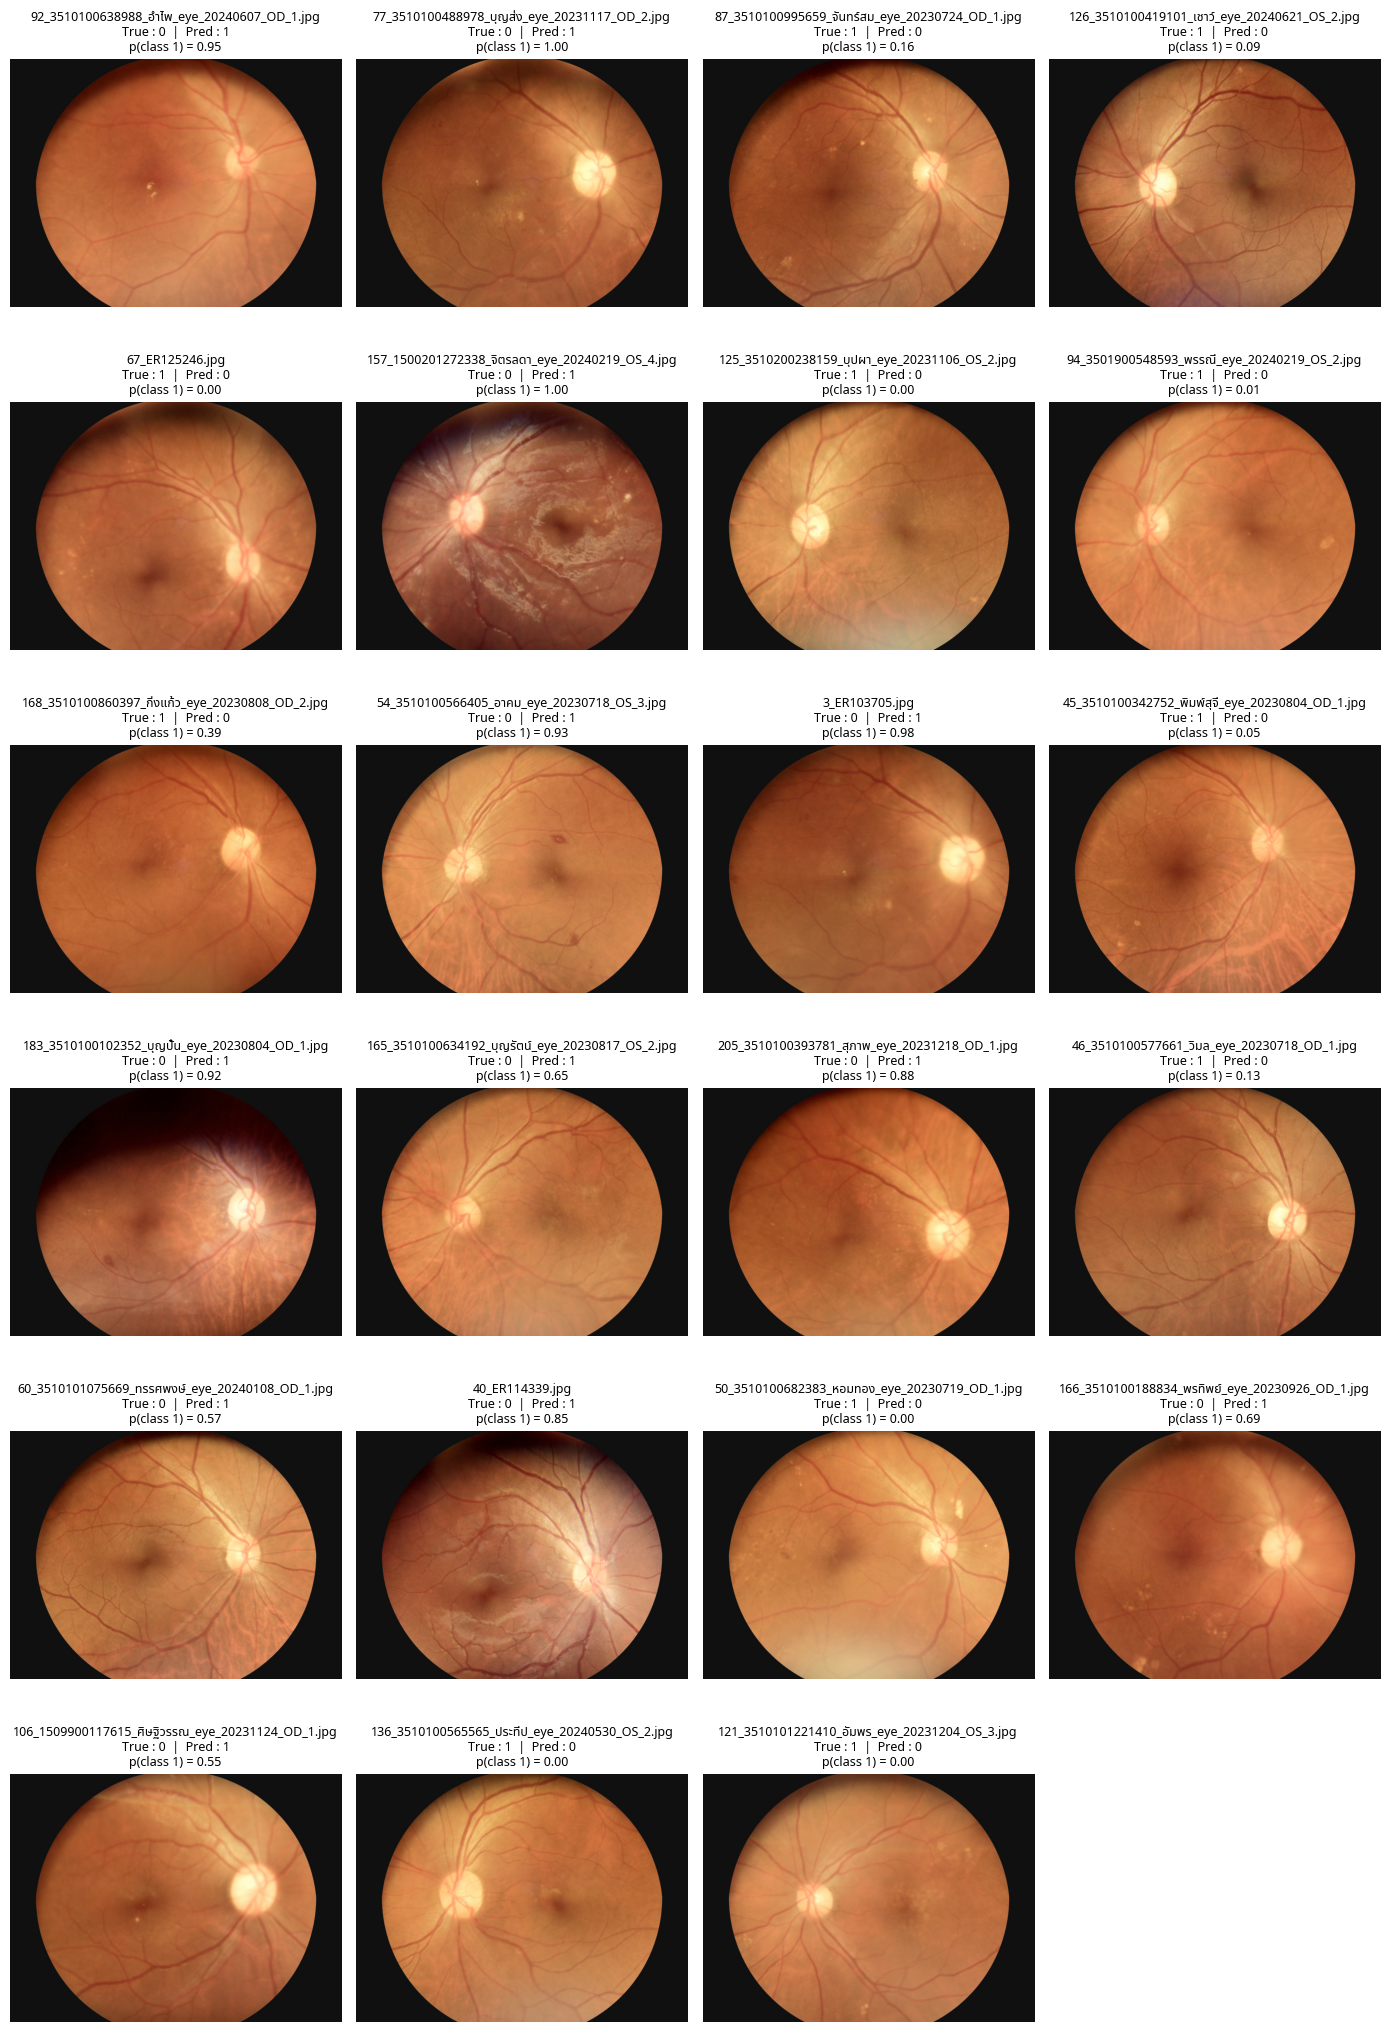

In [13]:
font_path = "/home/raphael/.fonts/static/NotoSansThai-Regular.ttf" 
mpl.font_manager.fontManager.addfont(font_path)
mpl.rc('font', family='Noto Sans Thai')
n = 27
samples = df_bad.sample(min(n, len(df_bad)), random_state=0)

cols = 4
rows = (len(samples) + cols - 1) // cols
plt.figure(figsize=(3.5*cols, 3.5*rows))

for i, (_, row) in enumerate(samples.iterrows(), 1):
    img = Image.open(row["filepath"])
    plt.subplot(rows, cols, i)
    plt.imshow(img)
    plt.axis("off")
    filename = Path(row["filepath"]).name  
    title = (
        f"{filename}\n" 
        f"True : {row['y_true']}  |  "
        f"Pred : {row['y_pred']}\n"
        f"p(class 1) = {row['prob_1']:.2f}"
    )
    plt.title(title, fontsize=9)
plt.tight_layout()
plt.show()